# CERVICAL CANCER EDA

In [51]:
# importing necesssary libraries
import pandas as pd # for data manipulation
import numpy as np # for numeric computation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical plots
import warnings
warnings.filterwarnings('ignore') # supress warnings

In [52]:
cervical = pd.read_excel("Dataset\Cervical Cancer Datasets_.xlsx")

In [53]:
cervical.head(10)

,Patient ID,Age,Sexual Partners,First Sexual Activity Age,HPV Test Result,Pap Smear Result,Smoking Status,STDs History,Region,Insrance Covered,Screening Type Last,Recommended Action,Unnamed: 12
0,P0001,18,4,15,NEGATIVE,N,N,Y,Pumwani,Y,PAP SMEAR,REPEAT PAP SMEAR IN 3 YEARS AND FOR HPV VACCINE,NaN
1,P0002,15,1,14,POSITIVE,N,Y,Y,Kakamega,N,HPV DNA,FOR HPV VACCINE AND SEXUAL EDUCATION,NaN
2,P0003,34,1,9,POSITIVE,N,N,Y,Machakos,N,HPV DNA,FOR HPV VACCINE AND SEXUAL EDUCATION,NaN
3,P0004,52,5,16,POSITIVE,N,Y,N,Embu,Y,HPV DNA,"FOR HPV VACCINE, LIFESTYLE AND SEXUAL EDUCATION",NaN
4,P0005,46,3,21,POSITIVE,N,N,N,Mombasa,N,HPV DNA,FOR HPV VACCINE AND SEXUAL EDUCATION,NaN
5,P0006,42,3,23,NEGATIVE,N,N,N,Embu,N,PAP SMEAR,REPEAT PAP SMEAR IN 3 YEARS AND FOR HPV VACCINE,NaN
6,P0007,51,3,27,POSITIVE,Y,Y,Y,Embu,Y,PAP SMEAR,FOR COLPOSCOPY CYTOLOGY AND BIOPSY,NaN
7,P0008,26,1,26,NEGATIVE,N,Y,N,Embu,N,PAP SMEAR,REPEAT PAP SMEAR IN 3 YEARS,NaN
8,P0009,49,1,20,POSITIVE,Y,Y,Y,Embu,Y,PAP SMEAR,"FOR COLPOSCOPY BIOSY, CYTOLOGY+/- TAH",NaN
9,P0010,89,3,15,NEGATIVE,N,N,Y,NAKURU,Y,VIA,FOR BIOPSY AND CYTOLOGY WITH TAH NOT RECOMMENDED,NaN


In [54]:
# drop column unnamed
cervical.drop(columns=["Unnamed: 12"], inplace=True)

In [55]:
cervical.head(5)

,Patient ID,Age,Sexual Partners,First Sexual Activity Age,HPV Test Result,Pap Smear Result,Smoking Status,STDs History,Region,Insrance Covered,Screening Type Last,Recommended Action
0,P0001,18,4,15,NEGATIVE,N,N,Y,Pumwani,Y,PAP SMEAR,REPEAT PAP SMEAR IN 3 YEARS AND FOR HPV VACCINE
1,P0002,15,1,14,POSITIVE,N,Y,Y,Kakamega,N,HPV DNA,FOR HPV VACCINE AND SEXUAL EDUCATION
2,P0003,34,1,9,POSITIVE,N,N,Y,Machakos,N,HPV DNA,FOR HPV VACCINE AND SEXUAL EDUCATION
3,P0004,52,5,16,POSITIVE,N,Y,N,Embu,Y,HPV DNA,"FOR HPV VACCINE, LIFESTYLE AND SEXUAL EDUCATION"
4,P0005,46,3,21,POSITIVE,N,N,N,Mombasa,N,HPV DNA,FOR HPV VACCINE AND SEXUAL EDUCATION


In [56]:
# Performing categorical-to-numerical encoding
#.map() is used to convert categorical text to numbers for ML models.'Y' → 1 and 'N' → 0 because models need numerical input.
# Fix data entry errors (like "NEGAGTIVE" in row 23)
cervical['HPV Test Result'] = cervical['HPV Test Result'].str.upper().replace({'NEGAGTIVE': 'NEGATIVE'})

# Convert categorical variables to appropriate types
cervical['HPV Test Result'] = cervical['HPV Test Result'].map({'POSITIVE': 1, 'NEGATIVE': 0})
cervical['Pap Smear Result'] = cervical['Pap Smear Result'].map({'Y': 1, 'N': 0})
cervical['Smoking Status'] = cervical['Smoking Status'].map({'Y': 1, 'N': 0})
cervical['STDs History'] = cervical['STDs History'].map({'Y': 1, 'N': 0})
cervical['Insrance Covered'] = cervical['Insrance Covered'].map({'Y': 1, 'N': 0})

# Extract key information from Recommended Action
cervical['Needs_Colposcopy'] = cervical['Recommended Action'].str.contains('COLPOSCOPY', case=False).astype(int)
cervical['Needs_Vaccine'] = cervical['Recommended Action'].str.contains('VACCINE', case=False).astype(int)
cervical['Needs_Biopsy'] = cervical['Recommended Action'].str.contains('BIOPSY', case=False).astype(int)

# SIZE OF THE DATASET


In [57]:
print(f'The dataset has {cervical.shape[0]} rows and {cervical.shape[1]} columns.')

The dataset has 100 rows and 15 columns.


# SUMMARY OF COLUMNS AND DATATYPES

In [58]:
cervical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient ID                 100 non-null    object 
 1   Age                        100 non-null    int64  
 2   Sexual Partners            100 non-null    int64  
 3   First Sexual Activity Age  100 non-null    int64  
 4   HPV Test Result            94 non-null     float64
 5   Pap Smear Result           100 non-null    int64  
 6   Smoking Status             100 non-null    int64  
 7   STDs History               100 non-null    int64  
 8   Region                     100 non-null    object 
 9   Insrance Covered           100 non-null    int64  
 10  Screening Type Last        100 non-null    object 
 11  Recommended Action         100 non-null    object 
 12  Needs_Colposcopy           100 non-null    int64  
 13  Needs_Vaccine              100 non-null    int64  


# STATISTICAL SUMMARY

In [59]:
cervical.describe()

,Age,Sexual Partners,First Sexual Activity Age,HPV Test Result,Pap Smear Result,Smoking Status,STDs History,Insrance Covered,Needs_Colposcopy,Needs_Vaccine,Needs_Biopsy
count,100.000000,100.000000,100.000000,94.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,37.430000,2.740000,18.830000,0.489362,0.350000,0.400000,0.480000,0.540000,0.270000,0.100000,0.230000
std,10.961139,1.432805,5.630105,0.502567,0.479372,0.492366,0.502117,0.500908,0.446196,0.301511,0.422953
min,15.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,2.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,3.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,40.000000,3.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,89.000000,9.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
# List all the columns
cervical.columns

Index(['Patient ID', 'Age', 'Sexual Partners', 'First Sexual Activity Age',
       'HPV Test Result', 'Pap Smear Result', 'Smoking Status', 'STDs History',
       'Region', 'Insrance Covered', 'Screening Type Last',
       'Recommended Action', 'Needs_Colposcopy', 'Needs_Vaccine',
       'Needs_Biopsy'],
      dtype='object')

In [61]:
# Checking for unique values
cervical.nunique()

Patient ID                   100
Age                           30
Sexual Partners                7
First Sexual Activity Age     21
HPV Test Result                2
Pap Smear Result               2
Smoking Status                 2
STDs History                   2
Region                        19
Insrance Covered               2
Screening Type Last            3
Recommended Action            27
Needs_Colposcopy               2
Needs_Vaccine                  2
Needs_Biopsy                   2
dtype: int64

In [62]:
# Checking for duplicates
cervical.duplicated().sum()

np.int64(0)

# VISUALIZATION

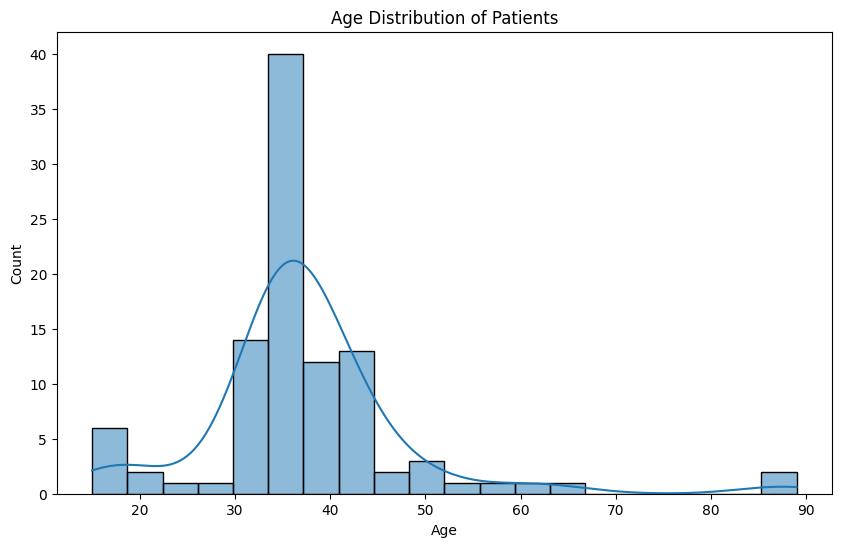

In [63]:
# The age distribution 
plt.figure(figsize=(10,6))
sns.histplot(cervical['Age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

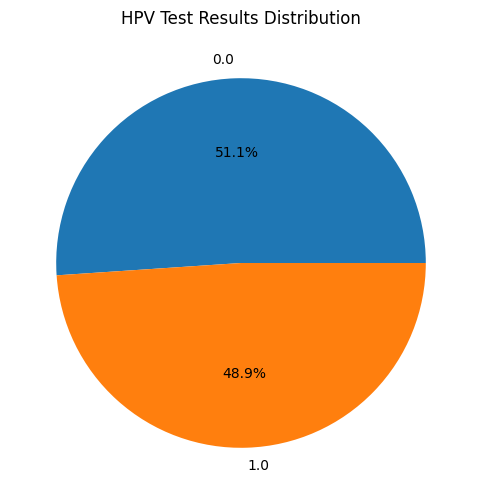

In [64]:
# HPV Test Result
plt.figure(figsize=(6,6))
cervical['HPV Test Result'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('HPV Test Results Distribution')
plt.ylabel('')
plt.show()

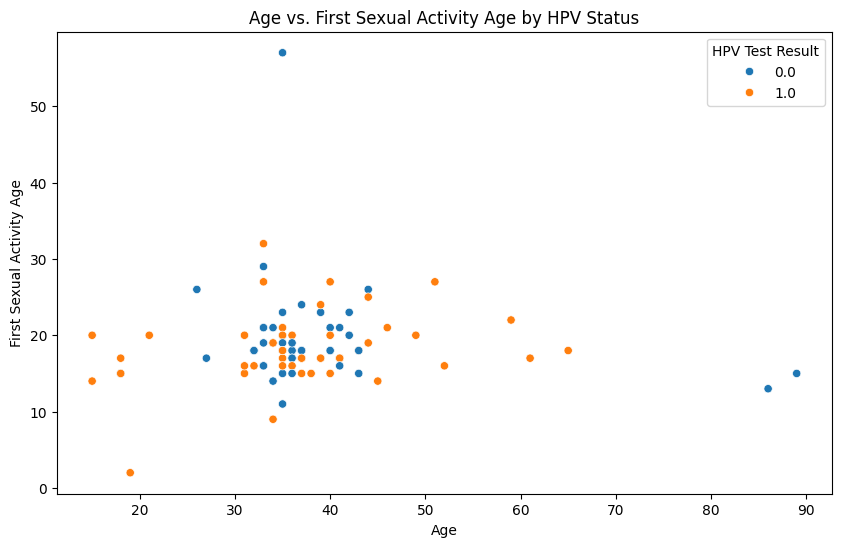

In [65]:
# Age vs First Sexual Activity by HPV Status
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='First Sexual Activity Age', hue='HPV Test Result', data=cervical)
plt.title('Age vs. First Sexual Activity Age by HPV Status')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'xtickts'

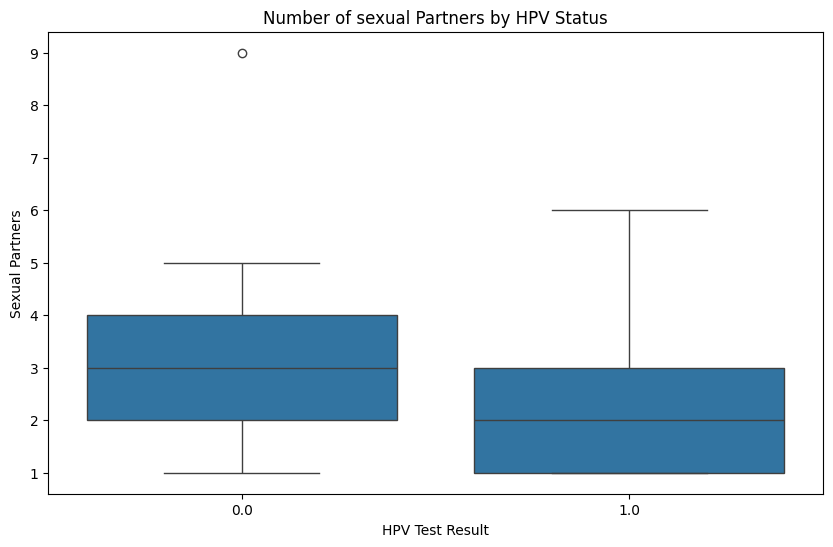

In [69]:
#Number of sexual partners by HPV Status
plt.figure(figsize=(10,6))
sns.boxplot(x="HPV Test Result", y="Sexual Partners", data = cervical)
plt.title("Number of sexual Partners by HPV Status")
plt.xtickts([0,1], ['Negative', 'Positive'])
plt.show()

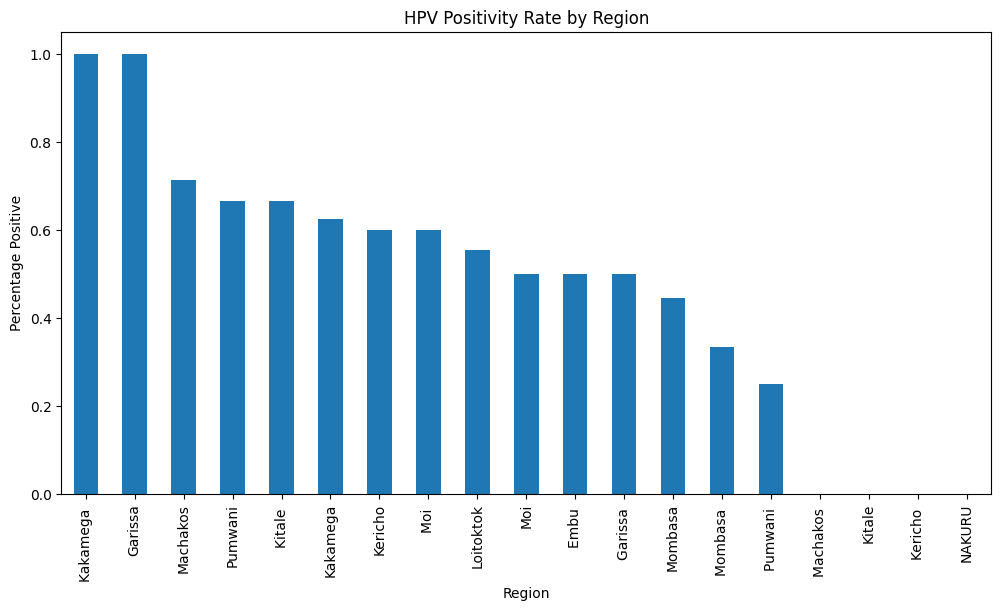

In [71]:
# HPV by region
plt.figure(figsize=(12,6))
region_hpv = cervical.groupby('Region')['HPV Test Result'].mean().sort_values(ascending=False)
region_hpv.plot(kind='bar')
plt.title('HPV Positivity Rate by Region')
plt.ylabel('Percentage Positive')
plt.show()